# Business Objective:  
Generate the features from the dataset and use them to recommend the books accordingly to the users.


### Load required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data set "Books".

In [2]:
books=pd.read_csv('books.csv')
books.head(15)

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\298032551.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


# EDA of Book

### Book data Information:

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Null Values present in BOOK dataset.

In [4]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

### Lets change the columns names .

In [5]:
books.rename({'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Year_of_publication','Image-URL-S': 'Image_URL_S', 'Image-URL-M': 'Image_URL_M','Image-URL-L':'Image_URL_L'},axis=1,inplace=True)

In [6]:
books.head(5)

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### No of Unique values .

In [7]:
print('shape of the books dataset:',books.shape)
print('no of unique books on dataset:',len(books['Title'].unique()))
print('no of unique books Author:',len(books['Author'].unique()))
print('no of unique books publisher:',len(books['Publisher'].unique()))

shape of the books dataset: (271360, 8)
no of unique books on dataset: 242135
no of unique books Author: 102024
no of unique books publisher: 16808


### Finding the index of the  null values.

In [8]:
# since the null values are less we can check that columns
np.where(books.isnull())

(array([128890, 129037, 187689, 209538, 220731, 221678], dtype=int64),
 array([4, 4, 2, 7, 7, 7], dtype=int64))

### selecting the every index and thir values in respective columns 

In [9]:
books.iloc[209538]

ISBN                                                          078946697X
Title                  DK Readers: Creating the X-Men, How It All Beg...
Author                                                              2000
Year_of_publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image_URL_S            http://images.amazon.com/images/P/078946697X.0...
Image_URL_M            http://images.amazon.com/images/P/078946697X.0...
Image_URL_L                                                          NaN
Name: 209538, dtype: object

* the index no 209538 having year of publication as Dk publishing Inc. by observing the values in that column we can say that there is column mismatched we can correct it by changing it to:
1. Year of publication :2000.
2. publisher : Dk "publishing Inc".
3. image are also changed so need to shift  the position  of each image.
4. Author : Dk Reader 
5. Title :Creating the X-Men, How It All Beg...


In [10]:
# replacing the values in index no 209538
books.at[209538,'ISBN']='078946697X'
books.at[209538,'Title']='Creating the X-Men, How It All Beg...'
books.at[209538,'Author']='Dk Reader'
books.at[209538,'Year_of_publication']=2000
books.at[209538,'Publisher']='DK Publishing Inc'
books.at[209538,'Image_URL_S']='http://images.amazon.com/images/P/078946697X.0...'
books.at[209538,'Image_URL_M']='http://images.amazon.com/images/P/078946697X.0...'
books.at[209538,'Image_URL_L']='http://images.amazon.com/images/P/078946697X.0...'

In [11]:
# updated values :
books.iloc[209538]

ISBN                                                          078946697X
Title                              Creating the X-Men, How It All Beg...
Author                                                         Dk Reader
Year_of_publication                                                 2000
Publisher                                              DK Publishing Inc
Image_URL_S            http://images.amazon.com/images/P/078946697X.0...
Image_URL_M            http://images.amazon.com/images/P/078946697X.0...
Image_URL_L            http://images.amazon.com/images/P/078946697X.0...
Name: 209538, dtype: object

In [12]:
books.iloc[220731]

ISBN                                                          2070426769
Title                  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Author                                                              2003
Year_of_publication                                            Gallimard
Publisher              http://images.amazon.com/images/P/2070426769.0...
Image_URL_S            http://images.amazon.com/images/P/2070426769.0...
Image_URL_M            http://images.amazon.com/images/P/2070426769.0...
Image_URL_L                                                          NaN
Name: 220731, dtype: object

* the index no  220731 also having mismatched columns so, we can correct it by changing it to:
1. Year of publication :2003.
2. publisher : Gallimard.
3. image are also changed so need to shift  the position  of each image.
4. Author : Jean-M... 
5. Title : Peuple du ciel, suivi de 'Les Bergers


In [13]:
# replacing the values in index no 220731
books.at[220731,'ISBN']='2070426769'
books.at[220731,'Title']='Peuple du ciel, suivi de Les Bergers'
books.at[220731,'Author']='Jean-M...'
books.at[220731,'Year_of_publication']=2003
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'Image_URL_S']='http://images.amazon.com/images/P/2070426769.0...'
books.at[220731,'Image_URL_M']='http://images.amazon.com/images/P/2070426769.0...'
books.at[220731,'Image_URL_L']='http://images.amazon.com/images/P/2070426769.0...'

In [14]:
books.iloc[221678]

ISBN                                                          0789466953
Title                  DK Readers: Creating the X-Men, How Comic Book...
Author                                                              2000
Year_of_publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image_URL_S            http://images.amazon.com/images/P/0789466953.0...
Image_URL_M            http://images.amazon.com/images/P/0789466953.0...
Image_URL_L                                                          NaN
Name: 221678, dtype: object

* the index no  221678 also having mismatched columns so, we can correct it by changing it to:
1. Year of publication :2000.
2. publisher : DK Publishing Inc.
3. image are also changed so need to shift  the position  of each image.
4. Author : DK Readers
5. Title : Creating the X-Men, How Comic Book...


In [15]:
# replacing the values in index no 221678
books.at[221678,'ISBN']='0789466953'
books.at[221678,'Title']='Creating the X-Men, How Comic Book...'
books.at[221678,'Author']='DK Readers'
books.at[221678,'Year_of_publication']=2000
books.at[221678,'Publisher']='DK Publishing Inc'
books.at[221678,'Image_URL_S']=' http://images.amazon.com/images/P/0789466953.0...'
books.at[221678,'Image_URL_M']=' http://images.amazon.com/images/P/0789466953.0...'
books.at[221678,'Image_URL_L']=' http://images.amazon.com/images/P/0789466953.0...'

In [16]:
# getting the index of missing values in Author columns.
np.where(books['Author'].isnull())

(array([187689], dtype=int64),)

In [17]:
# checking the values in index 187689
books.iloc[187689]

ISBN                                                          9627982032
Title                  The Credit Suisse Guide to Managing Your Perso...
Author                                                               NaN
Year_of_publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image_URL_S            http://images.amazon.com/images/P/9627982032.0...
Image_URL_M            http://images.amazon.com/images/P/9627982032.0...
Image_URL_L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object

* there is no author name found for this book

In [18]:
books.isnull().sum()

ISBN                   0
Title                  0
Author                 1
Year_of_publication    0
Publisher              2
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

In [19]:
np.where(books.isnull())

(array([128890, 129037, 187689], dtype=int64), array([4, 4, 2], dtype=int64))

In [20]:
# checking the index of 128890
books.iloc[128890]

ISBN                                                          193169656X
Title                                                        Tyrant Moon
Author                                                   Elaine Corvidae
Year_of_publication                                                 2002
Publisher                                                            NaN
Image_URL_S            http://images.amazon.com/images/P/193169656X.0...
Image_URL_M            http://images.amazon.com/images/P/193169656X.0...
Image_URL_L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object

* publisher of the above book tyrant Moon found 'Novelbooks Inc' so updating in table

In [21]:
# updating the values in index 128890
books.at[128890,'Publisher']='Novelbooks Inc'

In [22]:
#checking the values of index 129037
books.iloc[129037]

ISBN                                                          1931696993
Title                                                    Finders Keepers
Author                                                   Linnea Sinclair
Year_of_publication                                                 2001
Publisher                                                            NaN
Image_URL_S            http://images.amazon.com/images/P/1931696993.0...
Image_URL_M            http://images.amazon.com/images/P/1931696993.0...
Image_URL_L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object

In [23]:
# updating the index 
books.at[129037,'Publisher']='Novelbooks Incorporated'

In [24]:
books.isnull().sum()

ISBN                   0
Title                  0
Author                 1
Year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
dtype: int64

In [25]:
pd.to_numeric(books['Year_of_publication'])

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: Year_of_publication, Length: 271360, dtype: int64

In [26]:
books[['Year_of_publication']]=books[['Year_of_publication']].apply(pd.to_numeric)

##  Outliers In Year Of Publication .

In [27]:
x=books[(books['Year_of_publication']>2022) | (books['Year_of_publication']==0)].index
x

Int64Index([   176,    188,    288,    351,    542,    641,    646,    728,
               732,    735,
            ...
            270484, 270524, 270637, 270679, 270777, 270794, 270913, 271094,
            271182, 271196],
           dtype='int64', length=4631)

* We can see here that the Year of Publication for some books is greater than 2022 which is not possible.
* we will also drop the data where year of publication given as 0.

In [28]:
# drop that columns having published year more than 2022
books.drop(x,inplace=True)

In [29]:
books[(books['Year_of_publication']>2022) | (books['Year_of_publication']==0)].index

Int64Index([], dtype='int64')

In [30]:
books

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [31]:
#checking for duplicates
books['ISBN'].duplicated().sum()

0

# Visualization "Books"

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\2855681309.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


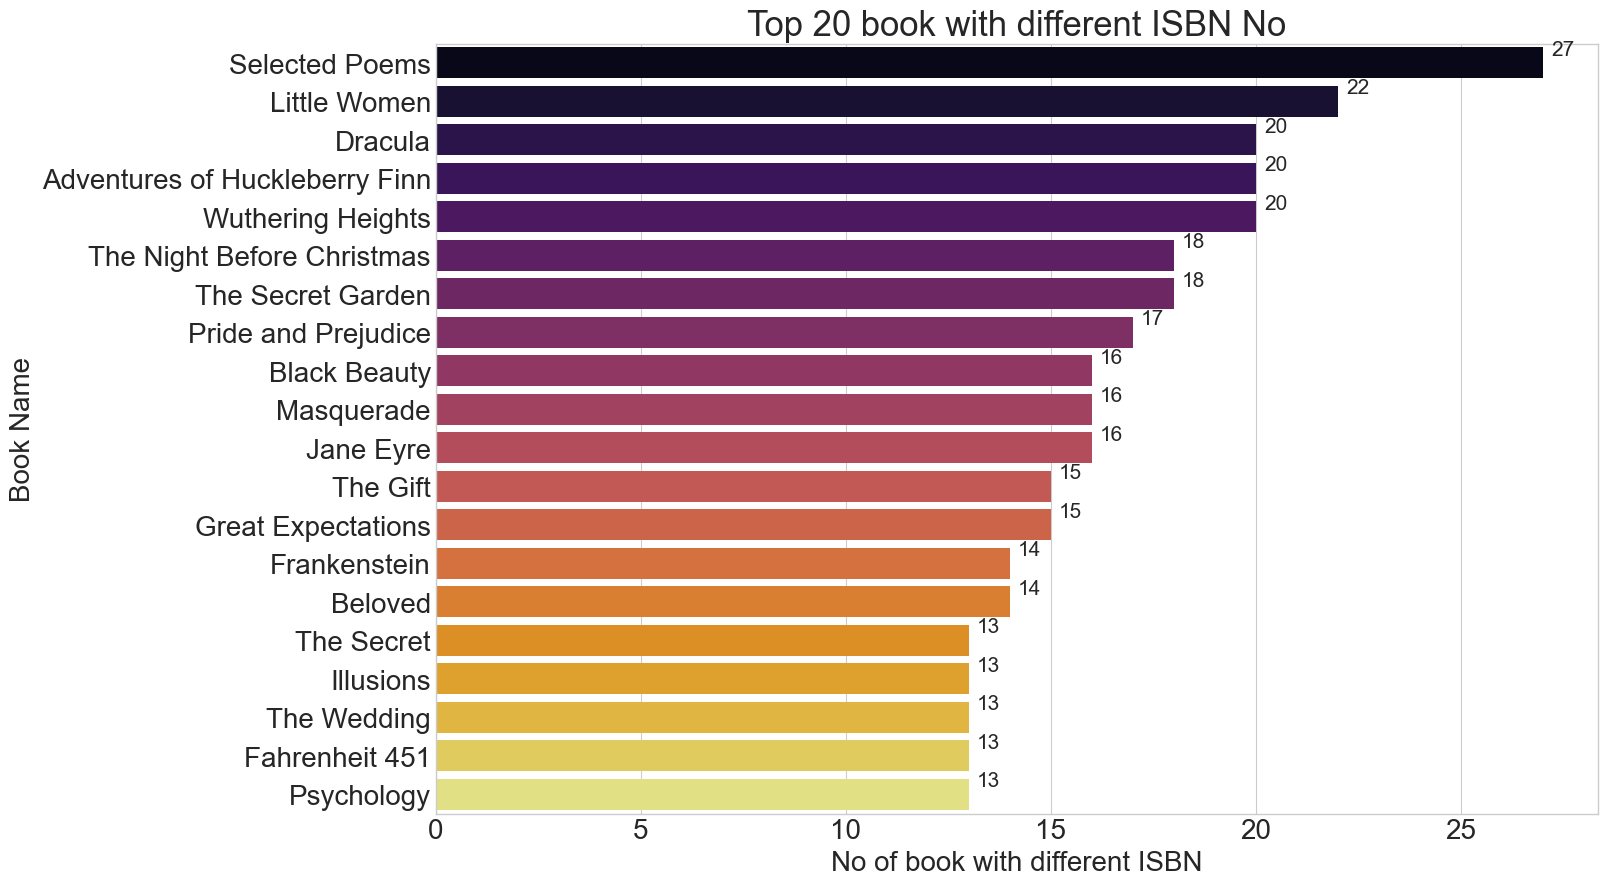

In [32]:
# Count of same book with different ISBN N0
book_name_count=books.groupby('Title').count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
book_name_count.drop_duplicates()

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Title',x='ISBN',data=book_name_count,palette='inferno')
plt.xlabel('No of book with different ISBN',fontsize=20)
plt.ylabel('Book Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 book with different ISBN No',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\4010625625.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


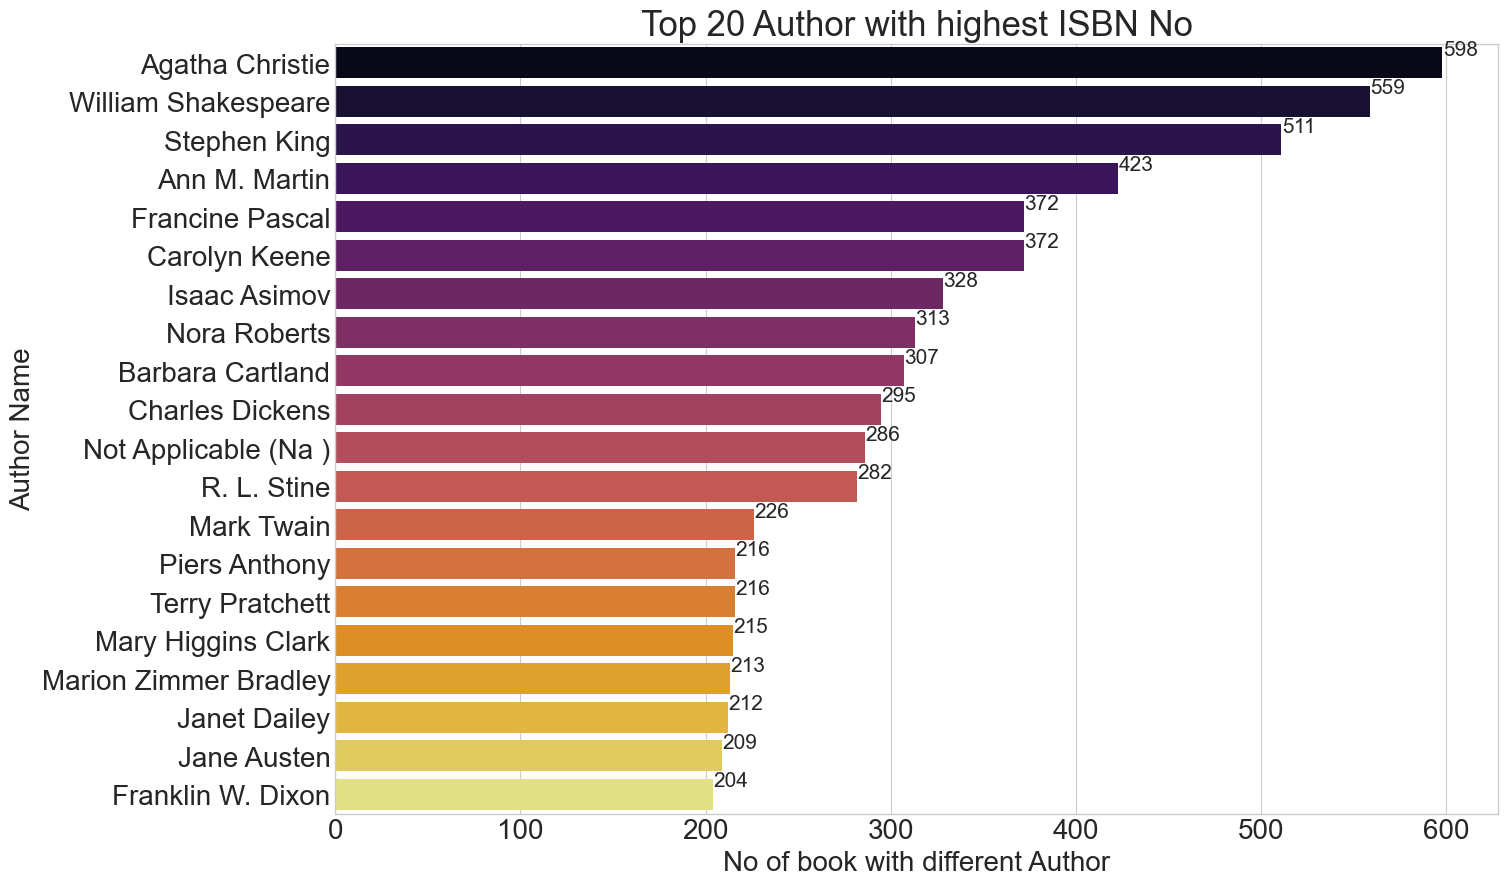

In [33]:
# Author with highest book 
book_with_diff_author=books.groupby('Author').count()['Title'].reset_index().sort_values('Title',ascending=False).head(20)
book_with_diff_author

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Author',x='Title',data=book_with_diff_author,palette='inferno')
plt.xlabel('No of book with different Author',fontsize=20)
plt.ylabel('Author Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 Author with highest ISBN No',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\598908036.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


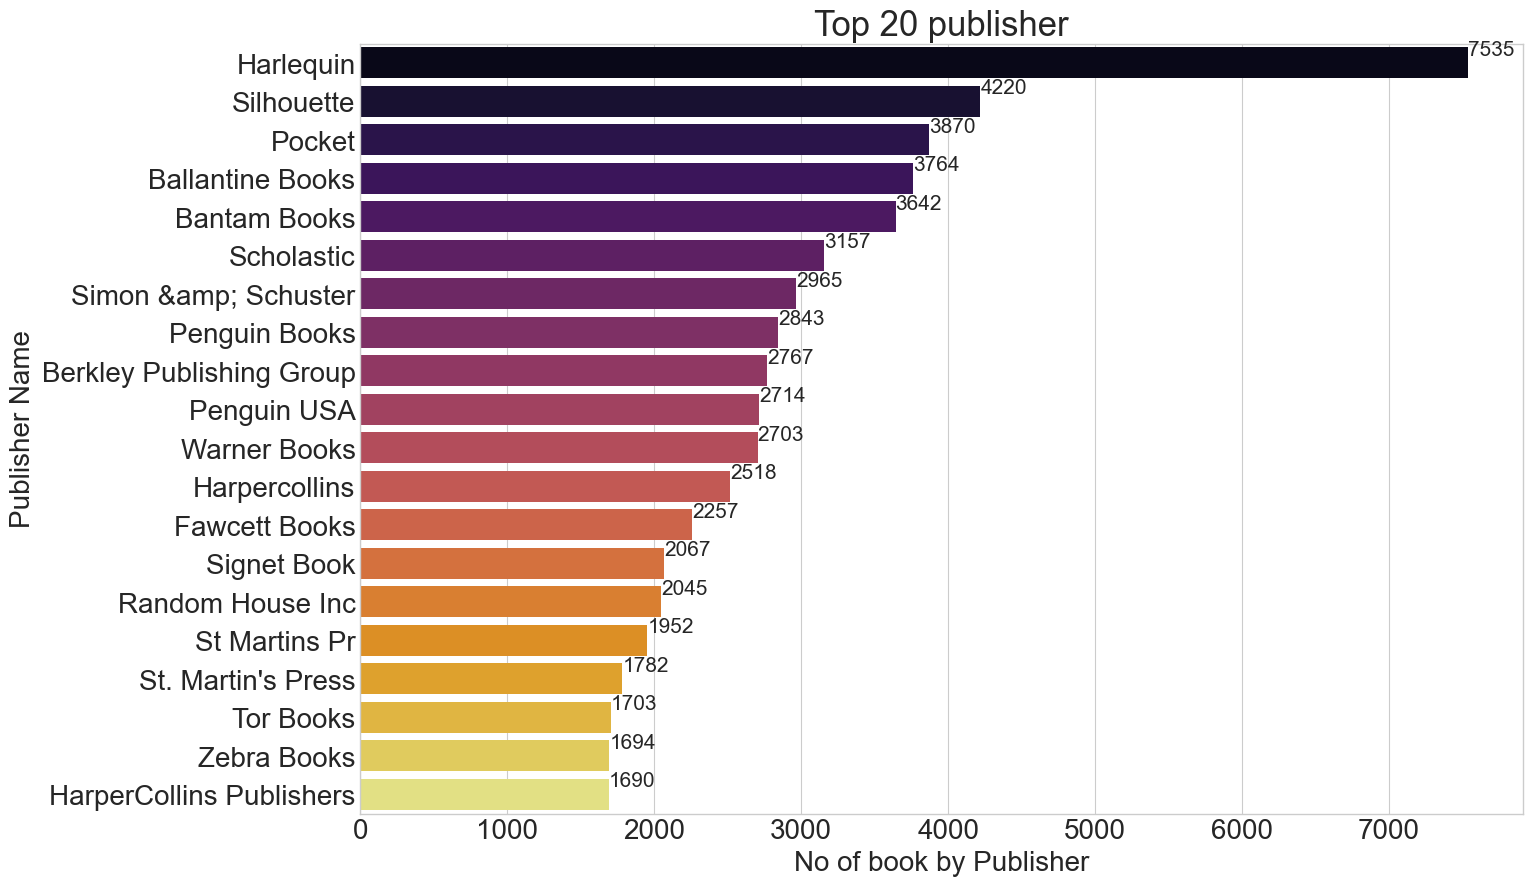

In [34]:
# Count of same book with different ISBN N0
no_of_book_by_Publisher=books.groupby('Publisher').count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
no_of_book_by_Publisher.drop_duplicates()

plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Publisher',x='ISBN',data=no_of_book_by_Publisher,palette='inferno')
plt.xlabel('No of book by Publisher',fontsize=20)
plt.ylabel('Publisher Name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 20 publisher',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

In [35]:
#  Author having same Book Title have different ISBN No 
no_of_book_by_Publisher=books.groupby(['Author','Title']).count()['ISBN'].reset_index().sort_values('ISBN',ascending=False).head(20)
no_of_book_by_Publisher.drop_duplicates()

,Author,Title,ISBN
158708,Mark Twain,Adventures of Huckleberry Finn,20
68303,Emily Bronte,Wuthering Heights,19
148210,Louisa May Alcott,Little Women,19
104693,Jane Austen,Pride and Prejudice,17
26220,Bram Stoker,Dracula,16
37220,Charlotte Bronte,Jane Eyre,14
74248,Frances Hodgson Burnett,The Secret Garden,14
35868,Charles Dickens,Great Expectations,14
11635,Anna Sewell,Black Beauty,14
162562,Mary Wollstonecraft Shelley,Frankenstein,12


## Loading the another dataset "users"

In [36]:
users=pd.read_csv('users.csv')
users.tail(15)

,User-ID,Location,Age
278843,278844,"st. paul, minnesota, usa",28.0
278844,278845,"järvenpää, uusimaa, finland",NaN
278845,278846,"toronto, ontario, canada",23.0
278846,278847,"brooklyn, new york, usa",NaN
278847,278848,"köln, nordrhein-westfalen, germany",NaN
278848,278849,"georgetown, ontario, canada",23.0
278849,278850,"sergnano, lombardia, italy",NaN
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


### USER Dataset Information:

In [37]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
# Renaming the user-id column
users.rename({'User-ID':'User_ID'},axis= True,inplace=True)

In [39]:
users.head(5)

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [40]:
# checking for duplicated values
users.duplicated().sum()

0

### Finding the Null value in User Dataset:

In [41]:
# checking for null values
users.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

### Describe the User dataset:

In [42]:
users.describe()

,User_ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Plotting the histogram for Age Columns:

<AxesSubplot: xlabel='Age', ylabel='Count'>

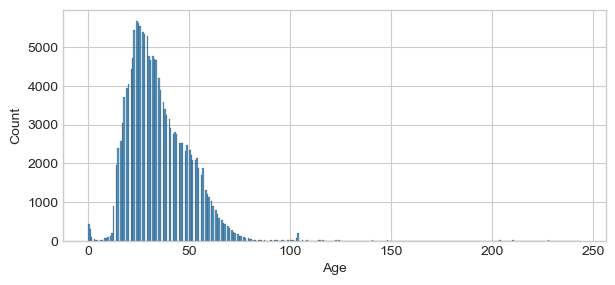

In [43]:
plt.figure(figsize=(7,3))
sns.histplot(x='Age',data=users)

### Plotting the Box plot to check the outliers in Age Column:

<AxesSubplot: >

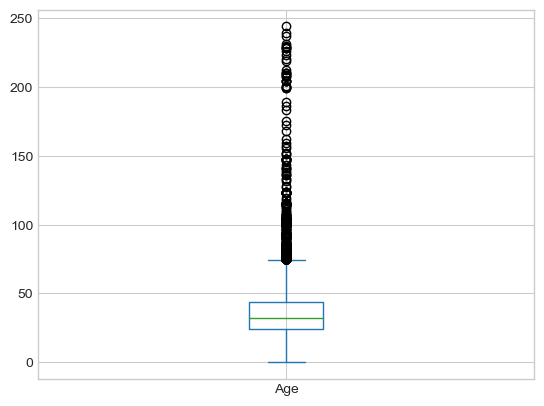

In [44]:
# checking for outlier using boxplot
users['Age'].plot(kind='box')

In [45]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

* here we can see the age values are more than 100 as this is unrealistic data

## Outlier:
* in obove data is it is observed that around 366 users having age more than 100 year.
* also some users having age below 10 year we will delete that records. 
* deleting all this oulier as it will affect the model accuracy.


In [46]:
# getting the index no of the rows having the age greater than 100 year and leass than 10 year
indexlist=users[(users['Age'] > 110) | (users['Age'] < 10)].index
indexlist

Int64Index([   219,    469,    561,    612,    670,    931,   1148,   1177,
              1460,   1564,
            ...
            276315, 276577, 276692, 276784, 276889, 277075, 277202, 277908,
            278265, 278751],
           dtype='int64', length=1165)

In [47]:
# we will drop the row which is having age more than 110 year and less than 10 year
y=users[(users['Age']>=110) | (users['Age'] <10 )].index
users.drop(y,inplace =True)

### Describing  the User after removing outliers from dataset:

In [48]:
users.describe()

,User_ID,Age
count,277692.000000,166930.000000
mean,139430.418676,34.888354
std,80494.155902,13.878243
min,1.000000,10.000000
25%,69715.750000,24.000000
50%,139426.500000,32.000000
75%,209130.250000,44.000000
max,278858.000000,109.000000


### Making the category for age 

In [49]:
age=[]
for values in users['Age']:
    if values < 10:
        age.append('below 10')
    elif values >= 10 and values <20:
        age.append('10 to 20')
    elif values >= 20  and values < 30 :
        age.append('20 to 30')
    elif values >=30 and values < 40:
        age.append('30 to 40')
    elif values >=40 and values < 50:
        age.append('40 to 50')
    elif values >=50 and values < 60:
        age.append('50 to 60')
    elif values >=60 and values < 70:
        age.append('60 to 70')
    elif values >=70 and values < 80:
        age.append('70 to 80') 
    elif values >=80 and values < 90:
        age.append('80 to 90')
    elif values >=90 and values < 100:
        age.append('90 to 100')
    elif values >=100 :
        age.append('above 100')    
    else:
        age.append(np.nan)
        
        
    
        
users['Age_category']=age       

 

In [50]:
users

,User_ID,Location,Age,Age_category
0,1,"nyc, new york, usa",NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20
2,3,"moscow, yukon territory, russia",NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20
4,5,"farnborough, hants, united kingdom",NaN,NaN
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,50 to 60
278855,278856,"brampton, ontario, canada",NaN,NaN
278856,278857,"knoxville, tennessee, usa",NaN,NaN


In [51]:
age_category_count=users.groupby('Age_category').count().reset_index()
age_category_count


,Age_category,User_ID,Location,Age
0,10 to 20,18894,18894,18894
1,20 to 30,51539,51539,51539
2,30 to 40,41889,41889,41889
3,40 to 50,26700,26700,26700
4,50 to 60,18811,18811,18811
5,60 to 70,6916,6916,6916
6,70 to 80,1644,1644,1644
7,80 to 90,199,199,199
8,90 to 100,62,62,62
9,above 100,276,276,276


Text(0.5, 1.0, 'No of book read by Age category')

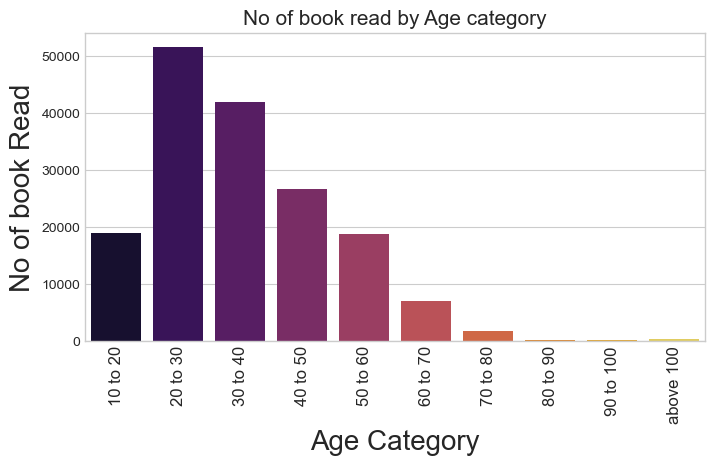

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(x='Age_category',y='Age',data=age_category_count,palette='inferno')
plt.ylabel('No of book Read', fontsize=20)
plt.xlabel('Age Category', fontsize=20)
plt.xticks(fontsize=12,rotation='vertical')
plt.title('No of book read by Age category',fontsize=15)


In [53]:
users

,User_ID,Location,Age,Age_category
0,1,"nyc, new york, usa",NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20
2,3,"moscow, yukon territory, russia",NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20
4,5,"farnborough, hants, united kingdom",NaN,NaN
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,50 to 60
278855,278856,"brampton, ontario, canada",NaN,NaN
278856,278857,"knoxville, tennessee, usa",NaN,NaN


## Loading the dataset "Rating"

In [54]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Information about Rating Columns:

In [55]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Checking the null values in rating dataset

In [56]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [57]:
ratings.rename({'Book-Rating':'Rating','User-ID':'User_ID'},axis=1, inplace=True)

In [58]:
ratings.head()

,User_ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [59]:
ratings['Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [60]:
rating_count=ratings['Rating'].value_counts().values
rating_label=ratings['Rating'].value_counts().index

Text(0, 0.5, 'No of rating count')

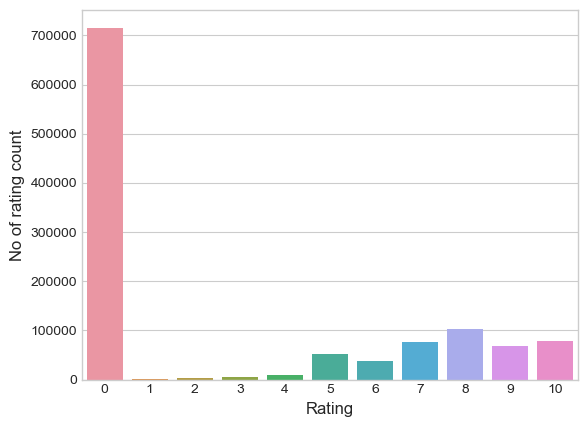

In [61]:
sns.barplot(x=rating_label,y=rating_count,data=ratings)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('No of rating count',fontsize=12)

## Merge the data set on common columns

In [62]:
# now we will merge the columns
# first we will merge rating with books finally we will merge it with users.
# merge the rating dataset with books on ISBN NO
data=pd.merge(left=books,right=ratings,on='ISBN',how='left')
data

,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,User_ID,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1018256,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463.0,7.0
1018257,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579.0,4.0
1018258,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680.0,0.0
1018259,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680.0,0.0


## Master Dataset:

In [63]:
df=pd.merge(left=users, right=data, on='User_ID', how='left')
df

,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,10 to 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197882,278854,"portland, oregon, usa",NaN,NaN,0425163393,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,7.0
1197883,278855,"tacoma, washington, united kingdom",50.0,50 to 60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197884,278856,"brampton, ontario, canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197885,278857,"knoxville, tennessee, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for null values in Master dataset:

In [64]:
df.isnull().sum()

User_ID                     0
Location                    0
Age                    347349
Age_category           347349
ISBN                   187405
Title                  187405
Author                 187406
Year_of_publication    187405
Publisher              187405
Image_URL_S            187405
Image_URL_M            187405
Image_URL_L            187405
Rating                 187405
dtype: int64

In [65]:
# when we merge dataframe we got NaN values this is because for some user-id ISBN not present 
#we will drop this values on basis of ISBN
indexna=df[(df['ISBN'].isna())].index
indexna

Int64Index([      0,       2,       3,       4,       5,       6,      28,
                 30,      35,      45,
            ...
            1197779, 1197841, 1197843, 1197844, 1197849, 1197874, 1197883,
            1197884, 1197885, 1197886],
           dtype='int64', length=187405)

In [66]:
df.drop(indexna,inplace=True)

In [67]:
df

,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",NaN,NaN,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",NaN,NaN,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",NaN,NaN,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",NaN,NaN,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1197879,278854,"portland, oregon, usa",NaN,NaN,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1197880,278854,"portland, oregon, usa",NaN,NaN,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1197881,278854,"portland, oregon, usa",NaN,NaN,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


### After dropping the null values from the master dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010482 entries, 1 to 1197882
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1010482 non-null  int64  
 1   Location             1010482 non-null  object 
 2   Age                  736232 non-null   float64
 3   Age_category         736232 non-null   object 
 4   ISBN                 1010482 non-null  object 
 5   Title                1010482 non-null  object 
 6   Author               1010481 non-null  object 
 7   Year_of_publication  1010482 non-null  float64
 8   Publisher            1010482 non-null  object 
 9   Image_URL_S          1010482 non-null  object 
 10  Image_URL_M          1010482 non-null  object 
 11  Image_URL_L          1010482 non-null  object 
 12  Rating               1010482 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 107.9+ MB


In [69]:
df.corr()

,User_ID,Age,Year_of_publication,Rating
User_ID,1.000000,0.000599,-0.008014,-0.042775
Age,0.000599,1.000000,-0.020880,-0.021725
Year_of_publication,-0.008014,-0.020880,1.000000,0.038009
Rating,-0.042775,-0.021725,0.038009,1.000000


* there is no any srong correlation found between age and other features so we can drop age columns

### "Visualization"

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\1640869155.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


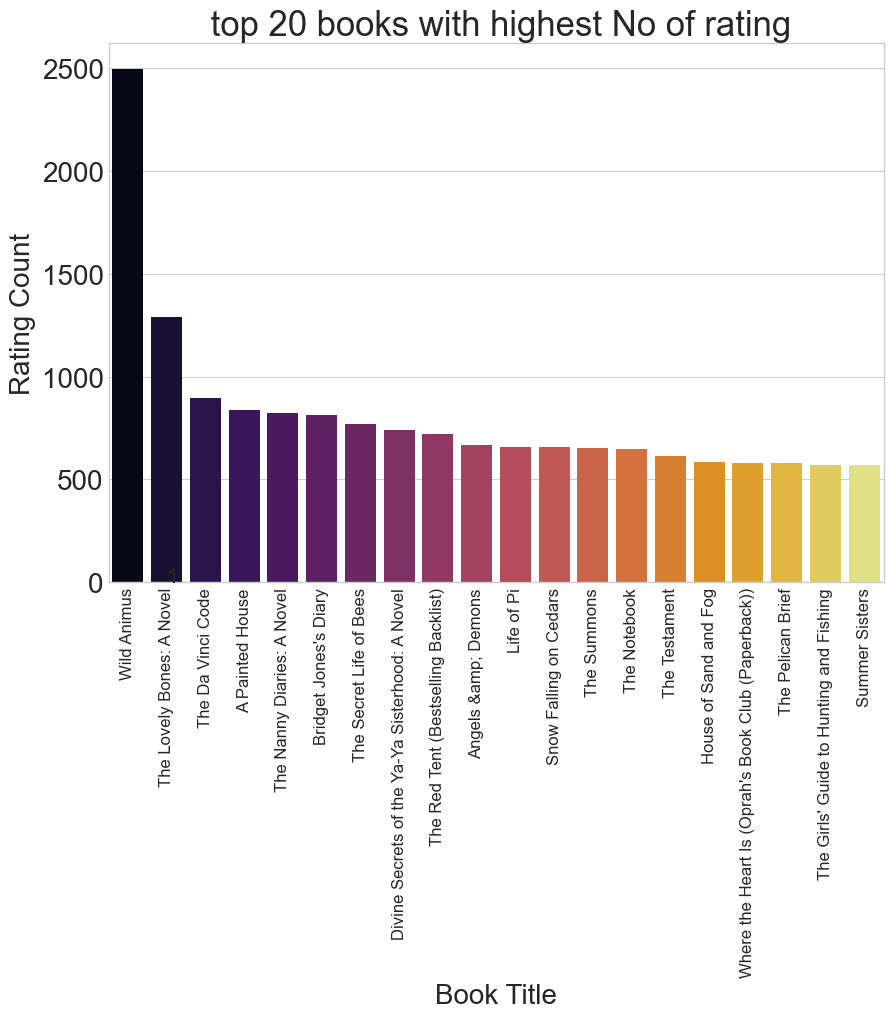

In [70]:
# top 20 books with highest No of book rating
rating_count=df.groupby('Title').count()['User_ID'].reset_index().sort_values(by='User_ID',ascending=False).head(20)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
ax=sns.barplot(x='Title',y='User_ID',data=rating_count,palette='inferno')
plt.ylabel('Rating Count',fontsize=20)
plt.xlabel('Book Title',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=12,rotation='vertical')
plt.title(' top 20 books with highest No of rating',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

In [71]:
Avg_rating=df.groupby(['Title']).mean()['Rating'].reset_index().sort_values('Rating',ascending=False)
Avg_rating

,Title,Rating
60096,Escape from Innsmouth,10.0
139971,Pregnancy &amp; Childbirth Tips,10.0
204621,"The Star in My Heart: Experiencing Sophia, Inn...",10.0
139967,Predictive astrology: Understanding transits a...,10.0
28892,Button Button: Identification and Price Guide,10.0
...,...,...
157207,Simon's Book,0.0
157206,"Simon'S Lady (Harlequin Historical, No 229)",0.0
73096,"Girl Named Rose (Harlequin Romance, No 2787)",0.0
73098,"Girl Next Door (Love Inspired, November 01)",0.0


### Checking  the Ave rating count for top rated books:

In [72]:
rating_count_b=df.groupby('Title').count()['User_ID'].reset_index().sort_values(by='User_ID',ascending=False)
rating_count_b

,Title,User_ID
230517,Wild Animus,2494
192390,The Lovely Bones: A Novel,1288
179725,The Da Vinci Code,894
5244,A Painted House,835
195287,The Nanny Diaries: A Novel,824
...,...,...
144650,Reclaim Your Health,1
144649,Reclaim Your Family from Addiction: How Couple...,1
144648,Reckoning of the Dead,1
144647,Reckoning at Yankee Flat,1


In [73]:
aaa=rating_count_b.merge(Avg_rating,on='Title')
aaa.rename(columns={'Rating':'Avg_Rating'},inplace=True)
aaa

,Title,User_ID,Avg_Rating
0,Wild Animus,2494,1.020850
1,The Lovely Bones: A Novel,1288,4.464286
2,The Da Vinci Code,894,4.653244
3,A Painted House,835,3.233533
4,The Nanny Diaries: A Novel,824,3.547330
...,...,...,...
236506,Reclaim Your Health,1,0.000000
236507,Reclaim Your Family from Addiction: How Couple...,1,0.000000
236508,Reckoning of the Dead,1,6.000000
236509,Reckoning at Yankee Flat,1,0.000000


* we can see here book with highest no of rating hav less average rating

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\2966893179.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


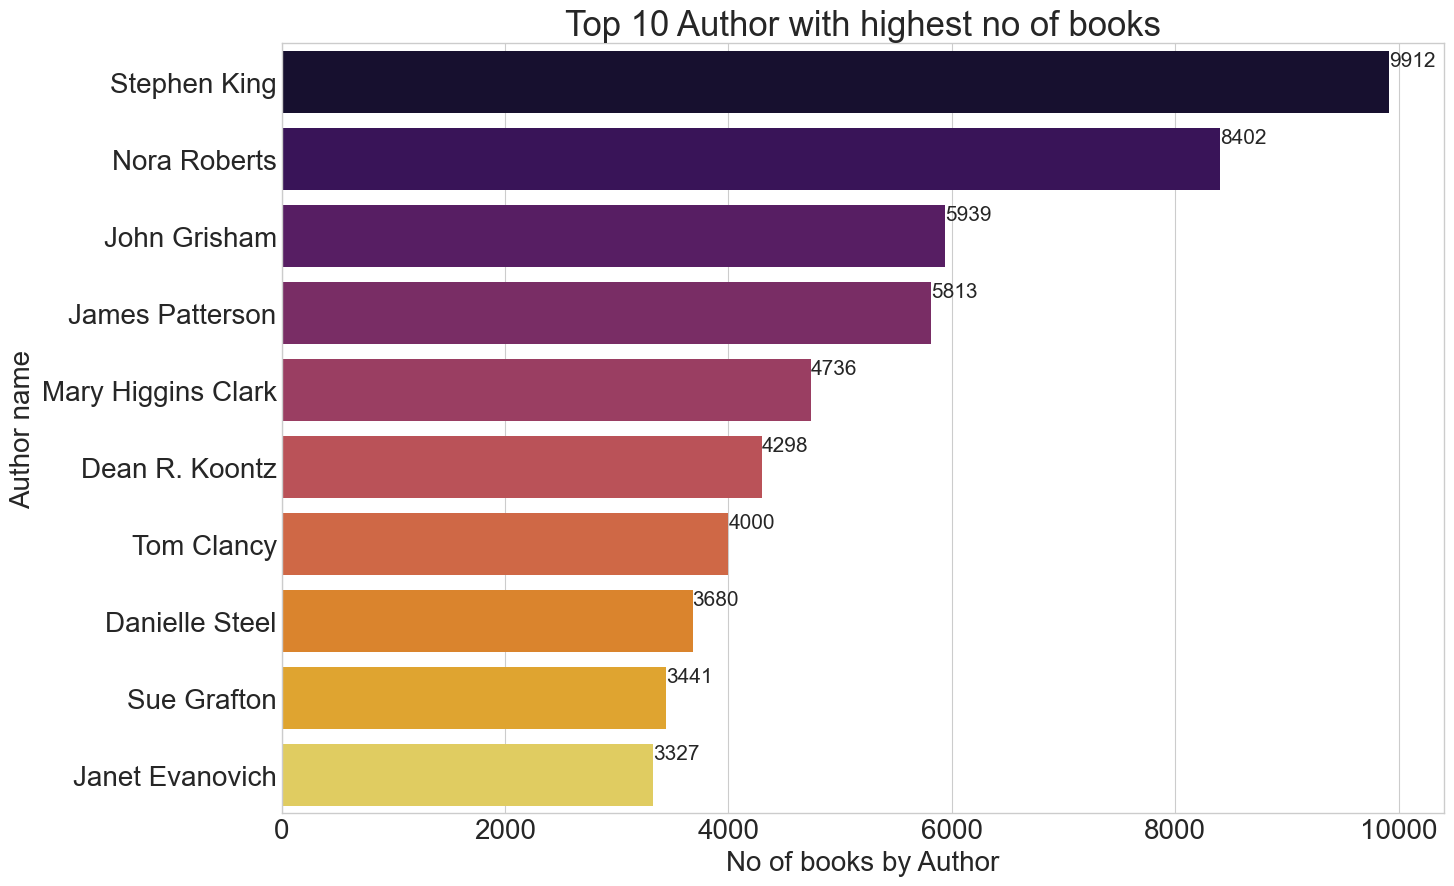

In [74]:
# no of rating count fot authors
Author_count=df.groupby('Author').count()['Rating'].reset_index().sort_values('Rating',ascending=False).head(10)
Author_count
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Author',x='Rating',data=Author_count,palette='inferno')
plt.xlabel('No of books by Author',fontsize=20)
plt.ylabel('Author name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 Author with highest no of books',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\3397749001.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'year with highest publication')

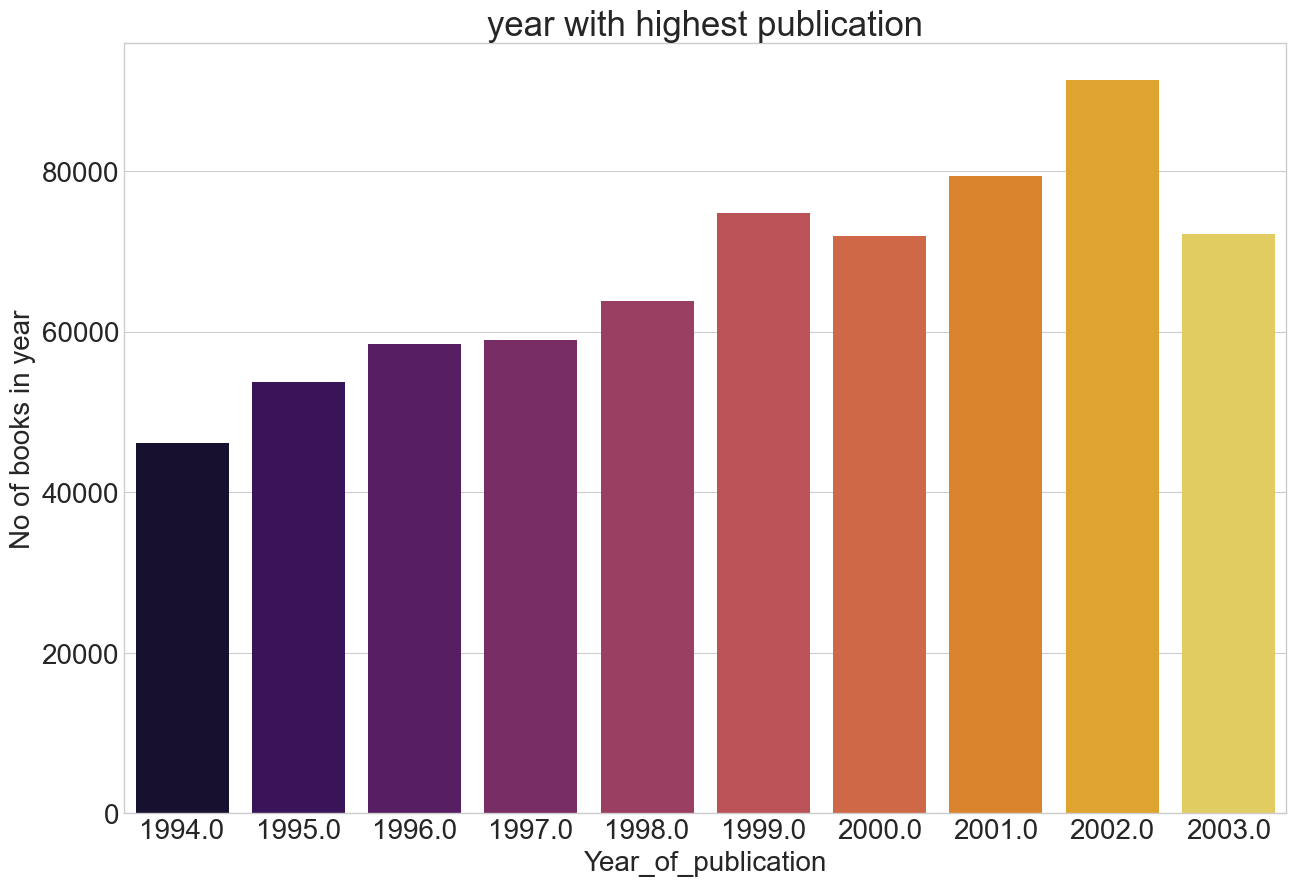

In [75]:
# In which year most book published
year=df.groupby('Year_of_publication').count()['Rating'].reset_index().sort_values("Rating",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(x='Year_of_publication',y='Rating',data=year,palette='inferno')
plt.ylabel('No of books in year',fontsize=20)
plt.xlabel('Year_of_publication',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('year with highest publication',fontsize=25)

C:\Users\hp\AppData\Local\Temp\ipykernel_15944\3043559712.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


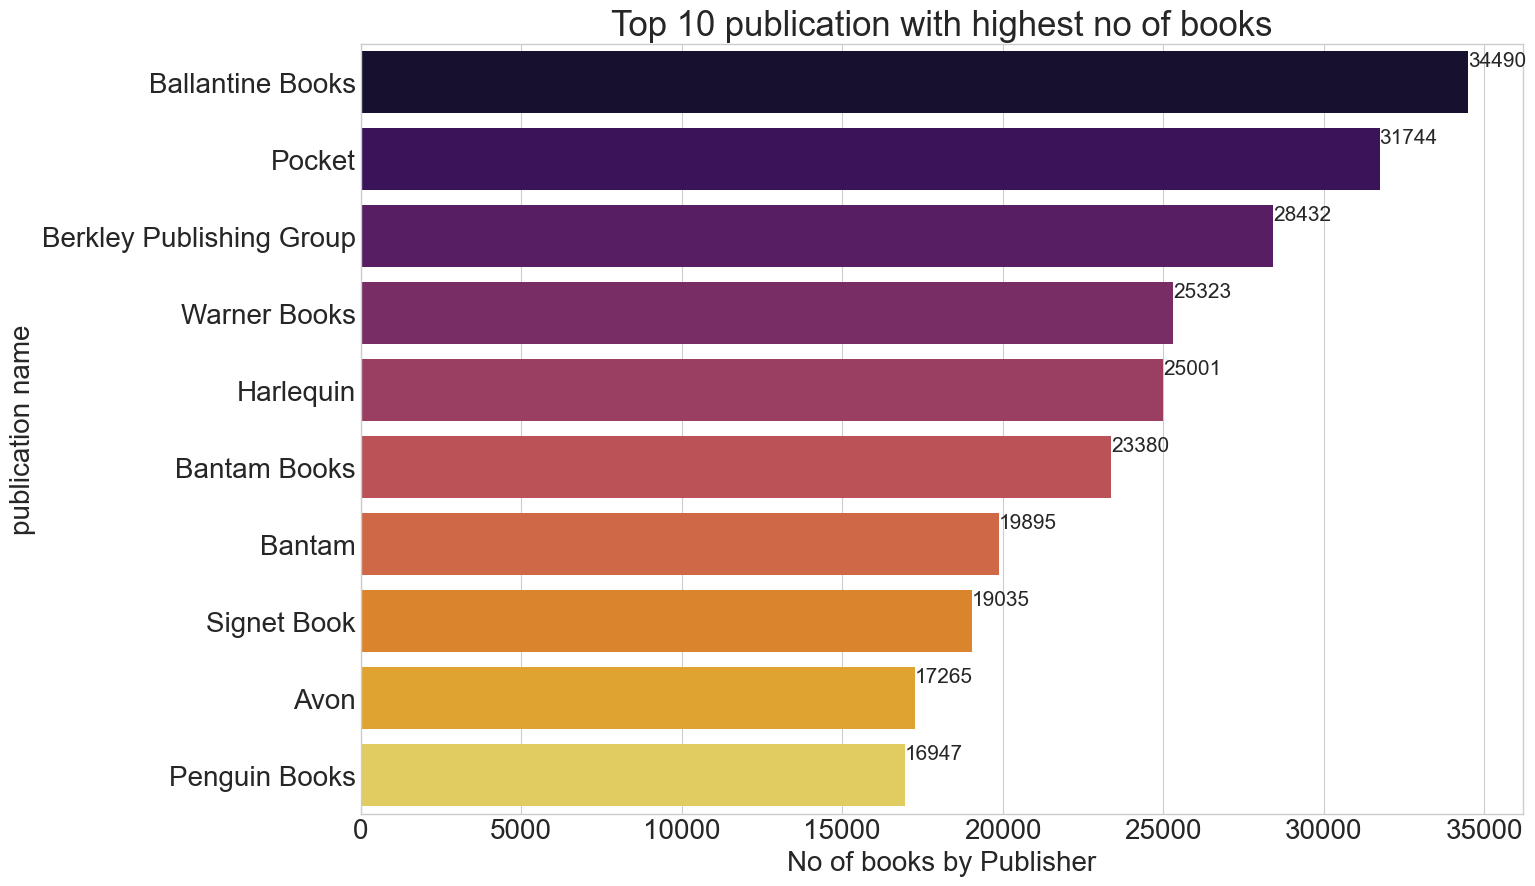

In [76]:
# pub;isher with highest book puplication
publication = df.groupby('Publisher').count()['Rating'].reset_index().sort_values('Rating',ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
ax= sns.barplot(y='Publisher',x='Rating',data=publication,palette='inferno')
plt.xlabel('No of books by Publisher',fontsize=20)
plt.ylabel('publication name',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 publication with highest no of books',fontsize=25)

#for showing the number on bar itself.
total=[]
for i in ax.patches:
    total.append(i.get_width())
total=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+0.2,i.get_y()+0.2,str(round(i.get_width())),fontsize=15)

# model based on age Category

In [77]:
Model_data=df
#Model_data.drop(Model_data.iloc[:,13:14],axis=1,inplace=True)
#Model_data.rename(columns={'User_ID_x':'User_ID'},inplace=True)
Model_data


,User_ID,Location,Age,Age_category,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,10 to 20,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",NaN,NaN,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",NaN,NaN,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",NaN,NaN,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",NaN,NaN,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",NaN,NaN,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1197879,278854,"portland, oregon, usa",NaN,NaN,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1197880,278854,"portland, oregon, usa",NaN,NaN,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1197881,278854,"portland, oregon, usa",NaN,NaN,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [78]:
# We will drop the 'age_category 'column from dataset
Model_data.drop(columns={'Age_category'},inplace=True)

In [79]:
# We will fill the values nan with median of age
Model_data['Age']=Model_data['Age'].fillna(Model_data['Age'].median())
Model_data


,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1197879,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1197880,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1197881,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [80]:
Model_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0
1197879,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0
1197880,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0
1197881,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0


In [81]:
# now we will make function for categorcal feature of age
age=[]
for values in Model_data['Age']:
    if values < 15:
        age.append('Children')
    elif values >= 15 and values <25:
        age.append('Youth')
    elif values >= 25  and values < 66 :
        age.append("Adults")
    else:
        age.append('Seniors')
        
Model_data['Age_category']=age       


In [82]:
Model_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0,Adults
1197879,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0,Adults
1197880,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0,Adults
1197881,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0,Adults


In [83]:
Model_data1=Model_data.copy()
Model_data1

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197878,278854,"portland, oregon, usa",35.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,7.0,Adults
1197879,278854,"portland, oregon, usa",35.0,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,http://images.amazon.com/images/P/0515087122.0...,0.0,Adults
1197880,278854,"portland, oregon, usa",35.0,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,http://images.amazon.com/images/P/0553578596.0...,0.0,Adults
1197881,278854,"portland, oregon, usa",35.0,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,6.0,Adults


<AxesSubplot: xlabel='Age_category', ylabel='count'>

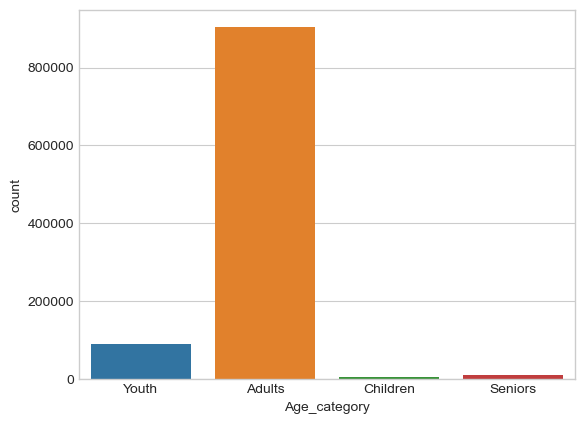

In [84]:
sns.countplot(data=Model_data, x='Age_category')

* as we have manupulated the values of age coulmn by imputing with median of age, we have got most users are from adult category
* second most age category peoples are from youth category 

In [85]:
# now we will sort the data by category
Children_data=Model_data1[Model_data1['Age_category']=="Children"]
Youth_data=Model_data1[Model_data1['Age_category']=="Youth"]
Adult_data=Model_data1[Model_data1['Age_category']=="Adults"]
Senior_data=Model_data1[Model_data1['Age_category']=="Seniors"]


# 1. Popular Books amoung the various age category:

## 1.1 books Popular amoung the children

In [86]:
C_Rating_count=Children_data.groupby('Title').count()['User_ID'].reset_index()
C_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [87]:
C_Avg_Rating=Children_data.groupby('Title').mean()['Rating'].reset_index()
C_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [88]:
Children=C_Rating_count.merge(C_Avg_Rating,on='Title')

In [89]:
final_children_data=Children.merge(Children_data,on='Title')
final_children_data

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,Final Fantasy Anthology: Official Strategy Gu...,1,10.0,30072,"st. louis, missouri, usa",11.0,1566869250,David Cassady,1999.0,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,10.0,Children
1,Pokemon: The Official Collector's Sticker Book,1,0.0,168464,"antioch, illinois, usa",11.0,0439106591,Maria S. Barbo,1999.0,Scholastic,http://images.amazon.com/images/P/0439106591.0...,http://images.amazon.com/images/P/0439106591.0...,http://images.amazon.com/images/P/0439106591.0...,0.0,Children
2,This Place Has No Atmosphere (Laurel-Leaf Books),1,0.0,256167,"temecula, california, usa",14.0,0440987261,Paula Danziger,1987.0,Random House Childrens Pub,http://images.amazon.com/images/P/0440987261.0...,http://images.amazon.com/images/P/0440987261.0...,http://images.amazon.com/images/P/0440987261.0...,0.0,Children
3,'N Sync: Tearing Up Our Hearts,1,0.0,252662,"san antonio, texas, usa",13.0,0312971982,Anna Louise Golden,1999.0,St. Martin's Press,http://images.amazon.com/images/P/0312971982.0...,http://images.amazon.com/images/P/0312971982.0...,http://images.amazon.com/images/P/0312971982.0...,0.0,Children
4,".Hack: //Legend of the Twilight, Vol. 1",1,9.0,30072,"st. louis, missouri, usa",11.0,1591824141,Tatsuya Hamazaki,2003.0,Tokyopop,http://images.amazon.com/images/P/1591824141.0...,http://images.amazon.com/images/P/1591824141.0...,http://images.amazon.com/images/P/1591824141.0...,9.0,Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,Zombies Don't Play Soccer (Adventures of the B...,1,0.0,168464,"antioch, illinois, usa",11.0,0590226363,Debbie Dadey,1995.0,Little Apple,http://images.amazon.com/images/P/0590226363.0...,http://images.amazon.com/images/P/0590226363.0...,http://images.amazon.com/images/P/0590226363.0...,0.0,Children
5851,Zoo School,1,0.0,168464,"antioch, illinois, usa",11.0,0618342044,Laurie Miller Hornik,2004.0,Clarion Books,http://images.amazon.com/images/P/0618342044.0...,http://images.amazon.com/images/P/0618342044.0...,http://images.amazon.com/images/P/0618342044.0...,0.0,Children
5852,"\Living Fire\"" and Other Science Fiction Stories""",1,0.0,46021,"christchurch, canterbury, new zealand",13.0,0552524530,N. Fisk,1987.0,Transworld Publishers Ltd,http://images.amazon.com/images/P/0552524530.0...,http://images.amazon.com/images/P/0552524530.0...,http://images.amazon.com/images/P/0552524530.0...,0.0,Children
5853,"\Who Was That Masked Man, Anyway?\""""",1,9.0,221614,"olympia, washington, usa",14.0,0380721139,Avi,1994.0,HarperTrophy,http://images.amazon.com/images/P/0380721139.0...,http://images.amazon.com/images/P/0380721139.0...,http://images.amazon.com/images/P/0380721139.0...,9.0,Children


In [90]:
final_children_data['Rating_count'].unique()

array([ 1,  2,  5,  3,  4,  9,  6,  7,  8, 13, 11, 15, 10, 39],
      dtype=int64)

In [91]:
# we will consider only that books having atleast 5 rating count and average rating above 5
famous_C_books=final_children_data[(final_children_data['Avg_Rating']>=5) & (final_children_data['Rating_count']>=5) ].sort_values('Avg_Rating',ascending=False)
famous_C_books=famous_C_books.drop_duplicates('Title')

In [92]:
famous_C_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1848,Harry Potter and the Prisoner of Azkaban (Book 3),11,8.818182,263793,"hyderabad, andhra pradesh, india",14.0,0439136369,J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,10.0,Children
4027,The Bad Beginning (A Series of Unfortunate Eve...,10,8.700000,31060,"westfield, indiana, usa",14.0,0064407667,Lemony Snicket,1999.0,HarperCollins,http://images.amazon.com/images/P/0064407667.0...,http://images.amazon.com/images/P/0064407667.0...,http://images.amazon.com/images/P/0064407667.0...,10.0,Children
1608,Gathering Blue (Readers Circle),5,8.600000,46443,"asheville, north carolina, usa",14.0,0440229499,LOIS LOWRY,2002.0,Laurel Leaf,http://images.amazon.com/images/P/0440229499.0...,http://images.amazon.com/images/P/0440229499.0...,http://images.amazon.com/images/P/0440229499.0...,8.0,Children
1851,Harry Potter and the Sorcerer's Stone (Book 1),7,8.000000,49204,"north lauderdale, florida, usa",14.0,043936213X,J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,0.0,Children
1819,Harry Potter and the Goblet of Fire (Book 4),9,7.555556,108243,"canton, ga, usa",14.0,0439139597,J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,10.0,Children


In [93]:
famous_C_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
1848,Harry Potter and the Prisoner of Azkaban (Book 3),8.818182,11
4027,The Bad Beginning (A Series of Unfortunate Eve...,8.700000,10
1608,Gathering Blue (Readers Circle),8.600000,5
1851,Harry Potter and the Sorcerer's Stone (Book 1),8.000000,7
1819,Harry Potter and the Goblet of Fire (Book 4),7.555556,9
674,Captain Underpants and the Attack of the Talki...,7.166667,6
1807,Harry Potter and the Chamber of Secrets (Book 2),7.076923,13
3610,Shiloh (Yearling Newbery),7.000000,5
4016,The BFG,6.500000,6
5584,"Welcome to Dead House (Goosebumps, No 1)",6.428571,7


In [94]:
import pickle

In [95]:
pickle.dump(famous_C_books,open('famous_C_books.pkl','wb'))

## 1.2 books Popular amoung the Youth:

In [96]:
Y_Rating_count=Youth_data.groupby('Title').count()['User_ID'].reset_index()
Y_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [97]:
Y_Avg_Rating=Youth_data.groupby('Title').mean()['Rating'].reset_index()
Y_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [98]:
Youth=Y_Rating_count.merge(Y_Avg_Rating,on='Title')

In [99]:
final_Youth_data=Youth.merge(Youth_data,on='Title')
final_Youth_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,A Light in the Storm: The Civil War Diary of ...,1,0.0,55927,"roscoe, minnesota, usa",17.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Youth
1,Final Fantasy Anthology: Official Strategy Gu...,1,0.0,28523,"springfield, missouri, usa",24.0,1566869250,David Cassady,1999.0,BradyGames,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,http://images.amazon.com/images/P/1566869250.0...,0.0,Youth
2,Garfield Bigger and Better (Garfield (Numbere...,1,7.0,200323,"beebeetown, iowa, usa",19.0,0345407709,Jim Davis,1996.0,Ballantine Books,http://images.amazon.com/images/P/0345407709.0...,http://images.amazon.com/images/P/0345407709.0...,http://images.amazon.com/images/P/0345407709.0...,7.0,Youth
3,Goosebumps Monster Edition 1: Welcome to Dead...,1,8.0,212697,"santa rosa, california, usa",18.0,0590509950,R. L. Stine,1995.0,Scholastic Paperbacks (T),http://images.amazon.com/images/P/0590509950.0...,http://images.amazon.com/images/P/0590509950.0...,http://images.amazon.com/images/P/0590509950.0...,8.0,Youth
4,Harry Potter and the Bible: The Menace Behind...,1,0.0,173684,"chula vista, california, usa",15.0,0889652015,Richard Abanes,2001.0,Horizon Books Publishers,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,http://images.amazon.com/images/P/0889652015.0...,0.0,Youth


In [100]:
final_Youth_data['Rating_count'].unique()

array([  1,   4,   2,  13,   3,  70,   6,  30,   9,   8,  10,  21,   7,
        16,  12,  39,   5,  23,  37,  19,  32,  11,  14,  27,  41,  34,
        40,  64,  71,  26,  36,  15,  22,  35,  54,  57,  17,  28,  20,
        18,  52, 100,  44,  24,  45,  31,  65,  25,  50,  74,  29,  47,
        33,  95,  72,  73,  42,  94,  43,  82,  51,  49,  58,  68,  53,
       106,  83,  61,  56,  38,  59,  60, 127,  63,  67,  55, 465],
      dtype=int64)

In [101]:
# we will consider only that books having atleast 10 rating count and average rating above 5
famous_Y_books=final_Youth_data[(final_Youth_data['Avg_Rating']>=5) & (final_Youth_data['Rating_count']>=10) ].sort_values('Avg_Rating',ascending=False)
famous_Y_books=famous_Y_books.drop_duplicates('Title').head(25)

In [102]:
famous_Y_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
69397,The Giver (Readers Circle),11,8.000000,152206,"waxahachie, texas, usa",16.0,0440237688,LOIS LOWRY,2002.0,Laurel Leaf,http://images.amazon.com/images/P/0440237688.0...,http://images.amazon.com/images/P/0440237688.0...,http://images.amazon.com/images/P/0440237688.0...,10.0,Youth
21374,El Hobbit,14,7.928571,105840,"madrid, madrid, spain",19.0,8445071416,J. R. R. Tolkien,1991.0,Minotauro,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,7.0,Youth
57660,Simisola,18,7.888889,71804,"la puente, california, usa",17.0,0440222028,Ruth Rendell,1996.0,Dell,http://images.amazon.com/images/P/0440222028.0...,http://images.amazon.com/images/P/0440222028.0...,http://images.amazon.com/images/P/0440222028.0...,9.0,Youth
29578,Hatchet,11,7.818182,277835,"baton rouge, louisiana, usa",16.0,014032724X,Gary Paulsen,1988.0,Penguin USA,http://images.amazon.com/images/P/014032724X.0...,http://images.amazon.com/images/P/014032724X.0...,http://images.amazon.com/images/P/014032724X.0...,10.0,Youth
12950,Chobits (Chobits),18,7.666667,9227,"glendora, california, usa",24.0,1591821533,Clamp,2003.0,TokyoPop,http://images.amazon.com/images/P/1591821533.0...,http://images.amazon.com/images/P/1591821533.0...,http://images.amazon.com/images/P/1591821533.0...,0.0,Youth


In [103]:
famous_Y_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
69397,The Giver (Readers Circle),8.000000,11
21374,El Hobbit,7.928571,14
57660,Simisola,7.888889,18
29578,Hatchet,7.818182,11
12950,Chobits (Chobits),7.666667,18
70570,The Hobbit,7.600000,10
74622,The Other Boleyn Girl,7.272727,11
29351,Harry Potter and the Sorcerer's Stone (Book 1),7.119048,42
39429,Lirael: Daughter of the Clayr,7.090909,11
54228,Rosencrantz &amp; Guildenstern Are Dead,6.916667,12


In [104]:
pickle.dump(famous_Y_books,open('famous_Y_books.pkl','wb'))

## 1.3 books Popular amoung the Adult:

In [105]:
A_Rating_count=Adult_data.groupby('Title').count()['User_ID'].reset_index()
A_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [106]:
A_Avg_Rating=Adult_data.groupby('Title').mean()['Rating'].reset_index()
A_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [107]:
Adult=A_Rating_count.merge(A_Avg_Rating,on='Title')

In [108]:
final_Adult_data=Adult.merge(Adult_data,on='Title')
final_Adult_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,A Light in the Storm: The Civil War Diary of ...,3,3.0,18995,"atlanta, georgia, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Adults
1,A Light in the Storm: The Civil War Diary of ...,3,3.0,35859,"duluth, minnesota, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,0.0,Adults
2,A Light in the Storm: The Civil War Diary of ...,3,3.0,96448,"albuquerque, new mexico, usa",35.0,0590567330,Karen Hesse,1999.0,Hyperion Books for Children,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,http://images.amazon.com/images/P/0590567330.0...,9.0,Adults
3,Always Have Popsicles,1,0.0,172742,"astoria, oregon, usa",44.0,0964147726,Rebecca Harvin,1994.0,Rebecca L. Harvin,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,http://images.amazon.com/images/P/0964147726.0...,0.0,Adults
4,Apple Magic (The Collector's series),1,0.0,198711,"little canada, minnesota, usa",62.0,0942320093,Martina Boudreau,1984.0,Amer Cooking Guild,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,http://images.amazon.com/images/P/0942320093.0...,0.0,Adults


In [109]:
final_Adult_data['Rating_count'].unique()

array([   3,    1,    2,    9,    8,    4,   11,   13,    7,    5,   33,
          6,   10,   22,   55,   12,   20,   24,   61,   14,   18,  192,
        469,   78,   19,   66,   47,   21,   94,   16,  329,   39,   44,
         76,  134,   27,   26,   23,   59,   37,   28,   17,  124,  297,
         34,   30,  207,   15,   25,   45,  222,  145,   77,   38,  132,
         82,   50,  102,   35,  130,  110,   63,   31,   41,   46,  157,
         79,   90,   64,  270,  265,   70,  171,   29,   32,  101,   53,
         72,  114,  164,  295,   49,   57,  779,  142,   62,   52,   58,
         74,  370,   36,   48,   42,   91,   89,   56,   51,  121,  194,
        472,  152,  196,  299,  253,  118,  141,   43,  248,   97,  224,
        146,  105,   84,  131,  170,   54,  227,  174,  272,   85,  107,
         40,   67,   69,   88,   73,  286,  203,  154,  596,   75,  158,
        167,  111,   93,  136,   68,  209,  195,  215,   99,  166,   95,
        231,  240,  128,   92,  177,   71,  260,  1

In [110]:
# we will consider only that books having atleast 100 rating count and average rating above 5
famous_A_books=final_Adult_data[(final_Adult_data['Avg_Rating']>=5) & (final_Adult_data['Rating_count']>=50) ].sort_values('Avg_Rating',ascending=False)
famous_A_books=famous_A_books.drop_duplicates('Title')

In [111]:
famous_A_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
785053,The Stand (The Complete and Uncut Edition),53,6.301887,90417,"rye, new hampshire, usa",40.0,0385199570,Stephen King,1990.0,Doubleday Books,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,0.0,Adults
281578,Griffin &amp; Sabine: An Extraordinary Corresp...,64,5.781250,102154,"salem, oregon, usa",35.0,0877017883,Nick Bantock,1991.0,Chronicle Books,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,10.0,Adults
529904,"Rich Dad, Poor Dad: What the Rich Teach Their ...",60,5.716667,223145,"manhattan, illinois, usa",45.0,0446677450,Robert T. Kiyosaki,2000.0,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,10.0,Adults
724543,The Little Prince,119,5.630252,238526,"charleston, south carolina, usa",35.0,0156528207,Antoine de Saint-ExupÃ©ry,1968.0,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,0.0,Adults
291107,Harry Potter and the Prisoner of Azkaban (Book 3),340,5.573529,52350,"lisboa, n/a, portugal",31.0,0439136350,J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,8.0,Adults


In [112]:
famous_A_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
785053,The Stand (The Complete and Uncut Edition),6.301887,53
281578,Griffin &amp; Sabine: An Extraordinary Corresp...,5.781250,64
529904,"Rich Dad, Poor Dad: What the Rich Teach Their ...",5.716667,60
724543,The Little Prince,5.630252,119
291107,Harry Potter and the Prisoner of Azkaban (Book 3),5.573529,340
290590,Harry Potter and the Goblet of Fire (Book 4),5.558528,299
703728,The Hobbit,5.507246,69
290948,Harry Potter and the Order of the Phoenix (Boo...,5.468992,258
291499,Harry Potter and the Sorcerer's Stone (Book 1),5.403509,228
349742,Jitterbug Perfume,5.400000,80


In [113]:
pickle.dump(famous_A_books,open('famous_A_books.pkl','wb'))

## 1.4 books Popular amoung the Senior

In [114]:
S_Rating_count=Senior_data.groupby('Title').count()['User_ID'].reset_index()
S_Rating_count.rename(columns={'User_ID':"Rating_count"},inplace=True)

In [115]:
S_Avg_Rating=Senior_data.groupby('Title').mean()['Rating'].reset_index()
S_Avg_Rating.rename(columns={'Rating':"Avg_Rating"},inplace=True)

In [116]:
Senior=S_Rating_count.merge(S_Avg_Rating,on='Title')

In [117]:
final_Senior_data=Senior.merge(Senior_data,on='Title')
final_Senior_data.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
0,Earth Prayers From around the World: 365 Pray...,1,0.0,236840,"geneva, iowa, usa",72.0,006250746X,Elizabeth Roberts,1991.0,HarperSanFrancisco,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,http://images.amazon.com/images/P/006250746X.0...,0.0,Seniors
1,Good Wives: Image and Reality in the Lives of...,2,4.0,88652,"lanham, maryland, usa",83.0,0679732578,Laurel Thatcher Ulrich,1991.0,Vintage Books USA,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,0.0,Seniors
2,Good Wives: Image and Reality in the Lives of...,2,4.0,187284,"houston, texas, usa",74.0,0679732578,Laurel Thatcher Ulrich,1991.0,Vintage Books USA,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,http://images.amazon.com/images/P/0679732578.0...,8.0,Seniors
3,'Tis: A Memoir,2,4.0,62348,"media, pennsylvania, usa",67.0,0684864495,Frank McCourt,1999.0,Scribner,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,8.0,Seniors
4,'Tis: A Memoir,2,4.0,208429,"monrovia, california, usa",68.0,0684864495,Frank McCourt,1999.0,Scribner,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,http://images.amazon.com/images/P/0684864495.0...,0.0,Seniors


In [118]:
final_Senior_data['Rating_count'].unique()

array([ 1,  2,  4,  7,  6,  5,  3, 13,  9,  8, 10, 11, 23, 15, 12, 14, 16,
       39], dtype=int64)

In [119]:
# we will consider only that books having atleast 5 rating count and average rating above 5
famous_S_books=final_Senior_data[(final_Senior_data['Avg_Rating']>=5) & (final_Senior_data['Rating_count']>=5) ].sort_values('Avg_Rating',ascending=False)
famous_S_books=famous_S_books.drop_duplicates('Title').head(25)

In [120]:
famous_S_books.head()

,Title,Rating_count,Avg_Rating,User_ID,Location,Age,ISBN,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
8055,The Da Vinci Code,23,7.260870,3556,"bismarck, north dakota, usa",68.0,0385504209,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,10.0,Seniors
4145,Jackdaws,6,7.166667,101304,"chesapeake, virginia, usa",68.0,0525946284,Ken Follett,2001.0,Dutton Books,http://images.amazon.com/images/P/0525946284.0...,http://images.amazon.com/images/P/0525946284.0...,http://images.amazon.com/images/P/0525946284.0...,8.0,Seniors
9427,The Smoke Jumper,8,7.125000,31343,"mesa, arizona, usa",75.0,0385334036,Nicholas Evans,2001.0,Delacorte Press,http://images.amazon.com/images/P/0385334036.0...,http://images.amazon.com/images/P/0385334036.0...,http://images.amazon.com/images/P/0385334036.0...,9.0,Seniors
9503,The Summons,16,7.062500,31343,"mesa, arizona, usa",75.0,0385503822,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,10.0,Seniors
9345,The Secret Life of Bees,5,7.000000,37255,"onalaska, washington, usa",66.0,0670894605,Sue Monk Kidd,2002.0,Viking Books,http://images.amazon.com/images/P/0670894605.0...,http://images.amazon.com/images/P/0670894605.0...,http://images.amazon.com/images/P/0670894605.0...,7.0,Seniors


In [121]:
famous_S_books[['Title','Avg_Rating','Rating_count']].head(10)

,Title,Avg_Rating,Rating_count
8055,The Da Vinci Code,7.260870,23
4145,Jackdaws,7.166667,6
9427,The Smoke Jumper,7.125000,8
9503,The Summons,7.062500,16
9345,The Secret Life of Bees,7.000000,5
29,1st to Die: A Novel,6.857143,7
4718,Looking Back,6.400000,5
9233,The Rescue,6.142857,7
7909,The Celestine Prophecy (Celestine Prophecy),6.142857,7
1557,Carolina Moon,6.000000,6


In [122]:
pickle.dump(famous_S_books,open('famous_S_books.pkl','wb'))

# 2. Popularity Based Recommendation System
* wee will take two criteria for popular books 
1. book with highest Avg rating 
2. book with at least have 150 rating count

#  Data Preparation

In [123]:
master_data=df.merge(aaa,on='Title')
master_data

,User_ID_x,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,User_ID_y,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,2,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,2,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,14,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,14,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,14,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010477,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,1,0.000000
1010478,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,1,5.000000
1010479,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,1,7.000000
1010480,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,1,7.000000


In [124]:
master_data.drop(master_data.iloc[:,13:14],axis=1,inplace=True)
master_data

,User_ID_x,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010477,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,0.000000
1010478,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,5.000000
1010479,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,7.000000
1010480,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,7.000000


In [125]:
master_data.rename(columns={'User_ID_x':'User_ID'},inplace=True)
master_data

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category,Avg_Rating
0,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth,3.500000
1,269782,"edmonton, alberta, canada",30.0,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,7.0,Adults,3.500000
2,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults,4.928571
3,11400,"ottawa, ontario, canada",49.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.0,Adults,4.928571
4,11676,"n/a, n/a, n/a",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,Adults,4.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010477,278851,"dallas, texas, usa",33.0,0743203763,As Hogan Said . . . : The 389 Best Things Anyo...,Randy Voorhees,2000.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,http://images.amazon.com/images/P/0743203763.0...,0.0,Adults,0.000000
1010478,278851,"dallas, texas, usa",33.0,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,5.0,Adults,5.000000
1010479,278851,"dallas, texas, usa",33.0,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,7.0,Adults,7.000000
1010480,278851,"dallas, texas, usa",33.0,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,7.0,Adults,7.000000


# Final Master Dataset:

In [126]:
#we will drop columns like Age, Location,Age_category,we will keep only one image urlsmall size
master_data.drop(columns={'Location','Age','Age_category','Image_URL_S','Image_URL_L'},inplace=True)
master_data.head()

,User_ID,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_M,Rating,Avg_Rating
0,2,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0.0,3.500000
1,269782,0801319536,Classical Mythology,Mark P. O. Morford,1998.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,7.0,3.500000
2,8,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5.0,4.928571
3,11400,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,0.0,4.928571
4,11676,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8.0,4.928571


### Calculating the Rating count for each book

In [127]:
# no of rating count
rating_count_with_name=df.groupby('Title').count()['Rating'].reset_index()
rating_count_with_name.rename(columns={'Rating':'Rating_count'},inplace =True)
rating_count_with_name

,Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
236506,Ã?Â?lpiraten.,2
236507,Ã?Â?rger mit Produkt X. Roman.,4
236508,Ã?Â?sterlich leben.,1
236509,Ã?Â?stlich der Berge.,3


### Calculating the Average rating for books

In [128]:
# average rating
Avg_Rating_with_name=df.groupby('Title').mean()['Rating'].reset_index()
Avg_Rating_with_name.rename(columns={'Rating':'Average_Rating'},inplace =True)
Avg_Rating_with_name

,Title,Average_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
236506,Ã?Â?lpiraten.,0.000000
236507,Ã?Â?rger mit Produkt X. Roman.,5.250000
236508,Ã?Â?sterlich leben.,7.000000
236509,Ã?Â?stlich der Berge.,2.666667


In [129]:
# merging the data rating count and avg rating
popular_df=rating_count_with_name.merge(Avg_Rating_with_name,on='Title').sort_values('Rating_count',ascending=False)
popular_df

,Title,Rating_count,Average_Rating
230517,Wild Animus,2494,1.020850
192390,The Lovely Bones: A Novel,1288,4.464286
179725,The Da Vinci Code,894,4.653244
5244,A Painted House,835,3.233533
195287,The Nanny Diaries: A Novel,824,3.547330
...,...,...,...
144650,Reclaim Your Health,1,0.000000
144649,Reclaim Your Family from Addiction: How Couple...,1,0.000000
144648,Reckoning of the Dead,1,6.000000
144647,Reckoning at Yankee Flat,1,0.000000


In [130]:
# for popular data we will consider only books with greater than 150 vote and top 50 with highest rating
popular_df=popular_df[popular_df['Rating_count'] >= 150].sort_values('Average_Rating',ascending=False).head(50)
popular_df.head(10)

,Title,Rating_count,Average_Rating
78694,Harry Potter and the Prisoner of Azkaban (Book 3),426,5.840376
78682,Harry Potter and the Goblet of Fire (Book 4),382,5.811518
78701,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
78686,Harry Potter and the Order of the Phoenix (Boo...,345,5.513043
59324,Ender's Game (Ender Wiggins Saga (Paperback)),248,5.431452
78674,Harry Potter and the Chamber of Secrets (Book 2),551,5.176044
187707,The Hobbit : The Enchanting Prelude to The Lor...,280,5.025000
183506,The Fellowship of the Ring (The Lord of the Ri...,367,4.934605
185386,The Giver (21st Century Reference),177,4.926554
92277,Ishmael: An Adventure of the Mind and Spirit,162,4.907407


In [131]:
popular_df.shape

(50, 3)

In [132]:
Final_popular_data=popular_df.merge(books,on='Title').drop_duplicates('Title')[['Title','Author','Year_of_publication','Publisher','Image_URL_M','Rating_count','Average_Rating']]
Final_popular_data

,Title,Author,Year_of_publication,Publisher,Image_URL_M,Rating_count,Average_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,426,5.840376
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,382,5.811518
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,345,5.513043
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,Tor Books,http://images.amazon.com/images/P/0312853238.0...,248,5.431452
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,551,5.176044
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,280,5.025000
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,367,4.934605
30,The Giver (21st Century Reference),LOIS LOWRY,1994,Laure Leaf,http://images.amazon.com/images/P/0440219078.0...,177,4.926554
32,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,1995,Bantam,http://images.amazon.com/images/P/0553375407.0...,162,4.907407


In [133]:
Final_popular_data['Image_URL_M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# 3.Collaborative Filtering Based Recommender System

## 3.1 item to item

# Data Preparation

In [134]:
df.head()

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
1,2,"stockton, california, usa",18.0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.0,Youth
7,8,"timmins, ontario, canada",35.0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,5.0,Adults
8,8,"timmins, ontario, canada",35.0,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,0.0,Adults
9,8,"timmins, ontario, canada",35.0,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.0,Adults
10,8,"timmins, ontario, canada",35.0,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.0,Adults


In [135]:
# for collaborative filtering we will take rating of that users who have given at list 150 rating to books
user_count=df.groupby('User_ID').count()['Rating'] >=200
popular_user=user_count[user_count].index
popular_user

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User_ID', length=802)

In [136]:
# df with padhelikhe users
filter_rating=df[df['User_ID'].isin(popular_user)]
filter_rating

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
473,254,"minneapolis, minnesota, usa",24.0,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,0.0,Youth
474,254,"minneapolis, minnesota, usa",24.0,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,0.0,Youth
475,254,"minneapolis, minnesota, usa",24.0,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,0.0,Youth
476,254,"minneapolis, minnesota, usa",24.0,0060013117,Night Watch,Terry Pratchett,2002.0,HarperCollins,http://images.amazon.com/images/P/0060013117.0...,http://images.amazon.com/images/P/0060013117.0...,http://images.amazon.com/images/P/0060013117.0...,0.0,Youth
477,254,"minneapolis, minnesota, usa",24.0,0060199563,Thief of Time,Terry Pratchett,2001.0,HarperCollins Publishers,http://images.amazon.com/images/P/0060199563.0...,http://images.amazon.com/images/P/0060199563.0...,http://images.amazon.com/images/P/0060199563.0...,0.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196977,278418,"omaha, nebraska, usa",35.0,1882419944,McSe Rapid Review for Tcp/Ip Microsoft Windows...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419944.0...,http://images.amazon.com/images/P/1882419944.0...,http://images.amazon.com/images/P/1882419944.0...,0.0,Adults
1196978,278418,"omaha, nebraska, usa",35.0,1882419952,Windows Nt Server 4.0 in the Enterprise (Rapid...,Michael A. Pastore,1999.0,29th Street Press,http://images.amazon.com/images/P/1882419952.0...,http://images.amazon.com/images/P/1882419952.0...,http://images.amazon.com/images/P/1882419952.0...,0.0,Adults
1196979,278418,"omaha, nebraska, usa",35.0,1882419960,McSe Systems Management Server 1.2: Rapid Revi...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419960.0...,http://images.amazon.com/images/P/1882419960.0...,http://images.amazon.com/images/P/1882419960.0...,0.0,Adults
1196980,278418,"omaha, nebraska, usa",35.0,1892083043,Gotcha! Strategy Games for Math and Logic (Hom...,Denise Gaskins,1998.0,Tabletop Academy Pr,http://images.amazon.com/images/P/1892083043.0...,http://images.amazon.com/images/P/1892083043.0...,http://images.amazon.com/images/P/1892083043.0...,0.0,Adults


In [137]:
# book criteria( at least 50 rating )
book_count=filter_rating.groupby('Title').count()['Rating'] >=50
famous_book=book_count[book_count].index
famous_book

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Title', length=694)

In [138]:
popular_book=filter_rating[filter_rating['Title'].isin(famous_book)]
popular_book.head()

,User_ID,Location,Age,ISBN,Title,Author,Year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L,Rating,Age_category
473,254,"minneapolis, minnesota, usa",24.0,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,0.0,Youth
474,254,"minneapolis, minnesota, usa",24.0,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,0.0,Youth
475,254,"minneapolis, minnesota, usa",24.0,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,0.0,Youth
496,254,"minneapolis, minnesota, usa",24.0,037582345X,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,http://images.amazon.com/images/P/037582345X.0...,9.0,Youth
497,254,"minneapolis, minnesota, usa",24.0,0375823468,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375823468.0...,http://images.amazon.com/images/P/0375823468.0...,http://images.amazon.com/images/P/0375823468.0...,9.0,Youth


In [139]:
popular_book.isnull().sum()

User_ID                0
Location               0
Age                    0
ISBN                   0
Title                  0
Author                 0
Year_of_publication    0
Publisher              0
Image_URL_S            0
Image_URL_M            0
Image_URL_L            0
Rating                 0
Age_category           0
dtype: int64

In [140]:
# pivot table ( user x item X rating)
pivot_table=popular_book.pivot_table(index='Title',columns='User_ID',values='Rating')
pivot_table

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [141]:
pivot_table.fillna(0,inplace=True)
pivot_table

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# libraries  for finding cosine similarities
from sklearn.metrics.pairwise import cosine_similarity


In [143]:
similarity_score=cosine_similarity(pivot_table)
similarity_score

array([[1.        , 0.0999137 , 0.01189468, ..., 0.11799012, 0.07158663,
        0.04289428],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01189468, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.11799012, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04289428, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [144]:
similarity_score.shape

(694, 694)

In [145]:
def recommend(book_name):
    index=np.where(pivot_table.index==book_name)[0][0]     # fetching the index of book_name
    similar_book=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]   #for that index finding similarity score with high values
    
    data=[]
    for i in similar_book:
        item=[]
        tem_df=popular_book[popular_book['Title']==pivot_table.index[i[0]]]
        item.extend(list(tem_df.drop_duplicates("Title")['Title'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Author'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Image_URL_M'].values))
        
        data.append(item)
            
    return data
        
            

In [146]:
recommend('Year of Wonders')

[['The Eight',
  'Katherine Neville',
  'http://images.amazon.com/images/P/0345366239.01.MZZZZZZZ.jpg'],
 ['A Heartbreaking Work of Staggering Genius',
  'Dave Eggers',
  'http://images.amazon.com/images/P/0375725784.01.MZZZZZZZ.jpg'],
 ['Bridget Jones: The Edge of Reason',
  'Helen Fielding',
  'http://images.amazon.com/images/P/0140298479.01.MZZZZZZZ.jpg'],
 ["Drowning Ruth (Oprah's Book Club)",
  'CHRISTINA SCHWARZ',
  'http://images.amazon.com/images/P/0345439104.01.MZZZZZZZ.jpg'],
 ['Midwives: A Novel',
  'Chris Bohjalian',
  'http://images.amazon.com/images/P/0375706771.01.MZZZZZZZ.jpg']]

# 3.Collaborative Filtering Based Recommender System

## 3.2 : (Item to Item )By standardizing the data

In [147]:
indexNO=pivot_table.index
columns_name=pivot_table.columns


In [148]:
from sklearn.preprocessing import StandardScaler
# compute required values
scaler = StandardScaler()
model = scaler.fit(pivot_table)
scaled_data = pd.DataFrame(model.transform(pivot_table),index=indexNO,columns=columns_name)
scaled_data

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,7.336300,-0.123463,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,6.185251,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
1st to Die: A Novel,-0.146151,-0.123463,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,6.800500,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
2nd Chance,-0.146151,8.991750,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
4 Blondes,-0.146151,-0.123463,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
A Bend in the Road,-0.146151,-0.123463,5.639715,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,-0.146151,-0.123463,-0.156294,10.635564,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,7.096575,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
You Belong To Me,-0.146151,-0.123463,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,-0.146151,-0.123463,-0.156294,-0.097209,-0.05376,-0.202722,-0.037987,-0.204378,-0.112135,-0.160484,...,-0.188267,-0.168066,-0.174738,-0.201158,-0.233439,-0.150784,-0.129905,-0.161154,-0.099409,-0.10413


In [149]:
similarity_score11=cosine_similarity(scaled_data)
similarity_score11

array([[ 1.        , -0.01462632, -0.03468803, ...,  0.0159081 ,
        -0.02027243, -0.01365296],
       [-0.01462632,  1.        ,  0.13574361, ..., -0.02461057,
        -0.03234075,  0.05067129],
       [-0.03468803,  0.13574361,  1.        , ..., -0.03374455,
        -0.05227312,  0.03302108],
       ...,
       [ 0.0159081 , -0.02461057, -0.03374455, ...,  1.        ,
        -0.00885633, -0.03156878],
       [-0.02027243, -0.03234075, -0.05227312, ..., -0.00885633,
         1.        , -0.0116652 ],
       [-0.01365296,  0.05067129,  0.03302108, ..., -0.03156878,
        -0.0116652 ,  1.        ]])

In [150]:
def recommend1(book_name):
    index=np.where(scaled_data.index==book_name)[0][0]     # fetching the index of book_name
    similar_book=sorted(list(enumerate(similarity_score11[index])),key=lambda x:x[1],reverse=True)[1:6]   #for that index finding similarity score with high values
    
    data=[]
    for i in similar_book:
        item=[]
        tem_df=popular_book[popular_book['Title']==scaled_data.index[i[0]]]
        item.extend(list(tem_df.drop_duplicates("Title")['Title'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Author'].values))
        item.extend(list(tem_df.drop_duplicates("Title")['Image_URL_M'].values))
        
        data.append(item)
            
    return data

In [151]:
recommend1("The Da Vinci Code")

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['The Lovely Bones: A Novel',
  'Alice Sebold',
  'http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg'],
 ['Back Roads',
  "Tawni O'Dell",
  'http://images.amazon.com/images/P/0670894184.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg']]

In [152]:
recommend('The Da Vinci Code')

[['Angels &amp; Demons',
  'Dan Brown',
  'http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg'],
 ['Touching Evil',
  'Kay Hooper',
  'http://images.amazon.com/images/P/0553583441.01.MZZZZZZZ.jpg'],
 ['Saving Faith',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446525774.01.MZZZZZZZ.jpg'],
 ["The Sweet Potato Queens' Book of Love",
  'JILL CONNER BROWNE',
  'http://images.amazon.com/images/P/0609804138.01.MZZZZZZZ.jpg'],
 ['Middlesex: A Novel',
  'Jeffrey Eugenides',
  'http://images.amazon.com/images/P/0312422156.01.MZZZZZZZ.jpg']]

# Conclusion:  
   1. by comparing the both models i.e. with and without scaling the data, the model first that is collborative filtering without scaling the data work good, so we will use that model for deployment

# Exporting the data for implementing model in flask

In [153]:
import pickle

In [154]:
pickle.dump(Final_popular_data,open('Popular.pkl','wb'))

In [155]:
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))
pickle.dump(popular_book,open('popular_book.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))

# Thank You